In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignore warnings
#load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/clustering/OLART_customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


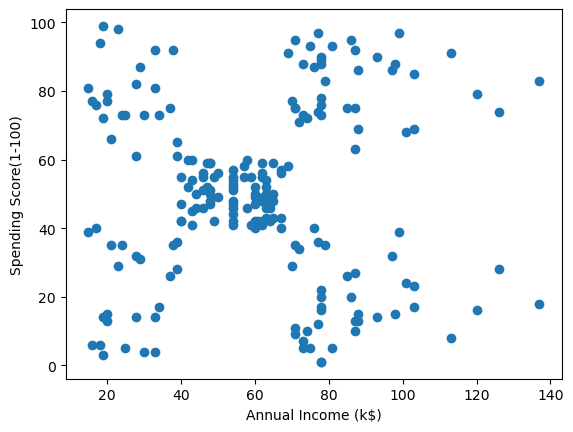

In [3]:
#select data of interest
sub_df = df.iloc[:,[3,4]] #Annual Income against Spending Score
x_1 = sub_df['Annual Income (k$)']
x_2 = sub_df['Spending Score (1-100)']

#plotting the data of interest
plt.figure()
plt.scatter(x_1,x_2)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Annual Income (k$) vs Spending Score')
plt.show()

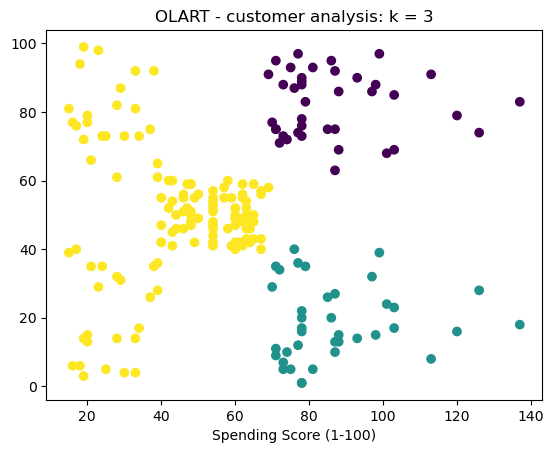

In [5]:
#Perform K-Means clustering
from sklearn.cluster import KMeans

k_choice = 3 #choice of k
km = KMeans(k_choice)
clusterIds = km.fit_predict(sub_df) #get data group labels

plt.figure()
plt.xlabel(sub_df.columns[0])
plt.xlabel(sub_df.columns[1])
plt.scatter(x_1,x_2,c=clusterIds)
plt.title('OLART - customer analysis: k = 3')
plt.show()

<b>Estimating the optimal value of k: Elbow Method</b>

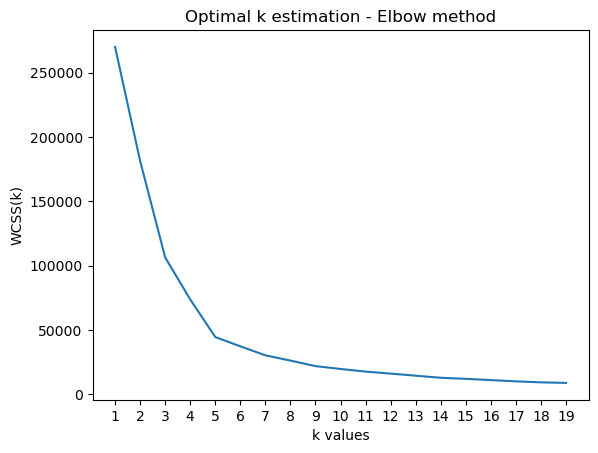

In [10]:
import numpy as np

wcss = []
for k in range(1,20): #set range k values to search from
    km = KMeans(k)
    km.fit(sub_df)
    wcss_iter = km.inertia_ #store the WCSS per the current k
    wcss.append(wcss_iter)

plt.figure()
plt.plot(np.arange(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel('k values')
plt.ylabel('WCSS(k)')
plt.title('Optimal k estimation - Elbow method')
plt.show()

In [ ]:
k_optimal = 5  #s
km = KMeans(k_optimal)
clusterIds = km.fit_predict(sub_df) #get data group labels

plt.figure()
plt.xlabel(sub_df.columns[0])
plt.xlabel(sub_df.columns[1])
plt.scatter(x_1,x_2,c=clusterIds)
plt.title('OLART - customer analysis: k = 3')
plt.show()